In [7]:
# importing the all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [11]:
df= pd.read_csv(r'C:\Users\pavan\Downloads\abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [13]:
#finding the shape of dataset
df.shape

(4177, 9)

In [14]:
#finding the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [15]:
#finding is there any null values. there are zero null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [16]:
#here we describe all the mean max count and everything
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [18]:
df.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
age               10.395266
dtype: float64

In [22]:
df_sex = df['Sex'].value_counts()
print(df_sex.head())


M    1528
I    1342
F    1307
Name: Sex, dtype: int64


<AxesSubplot:ylabel='age'>

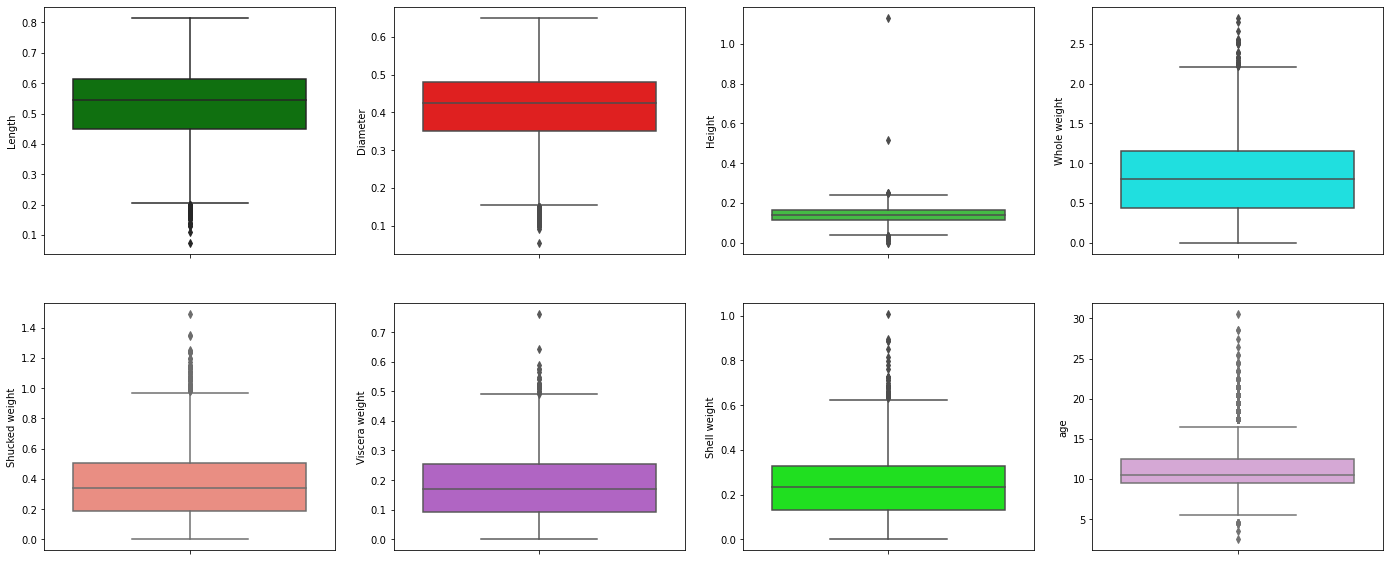

In [23]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'age', data = df, color = 'plum')

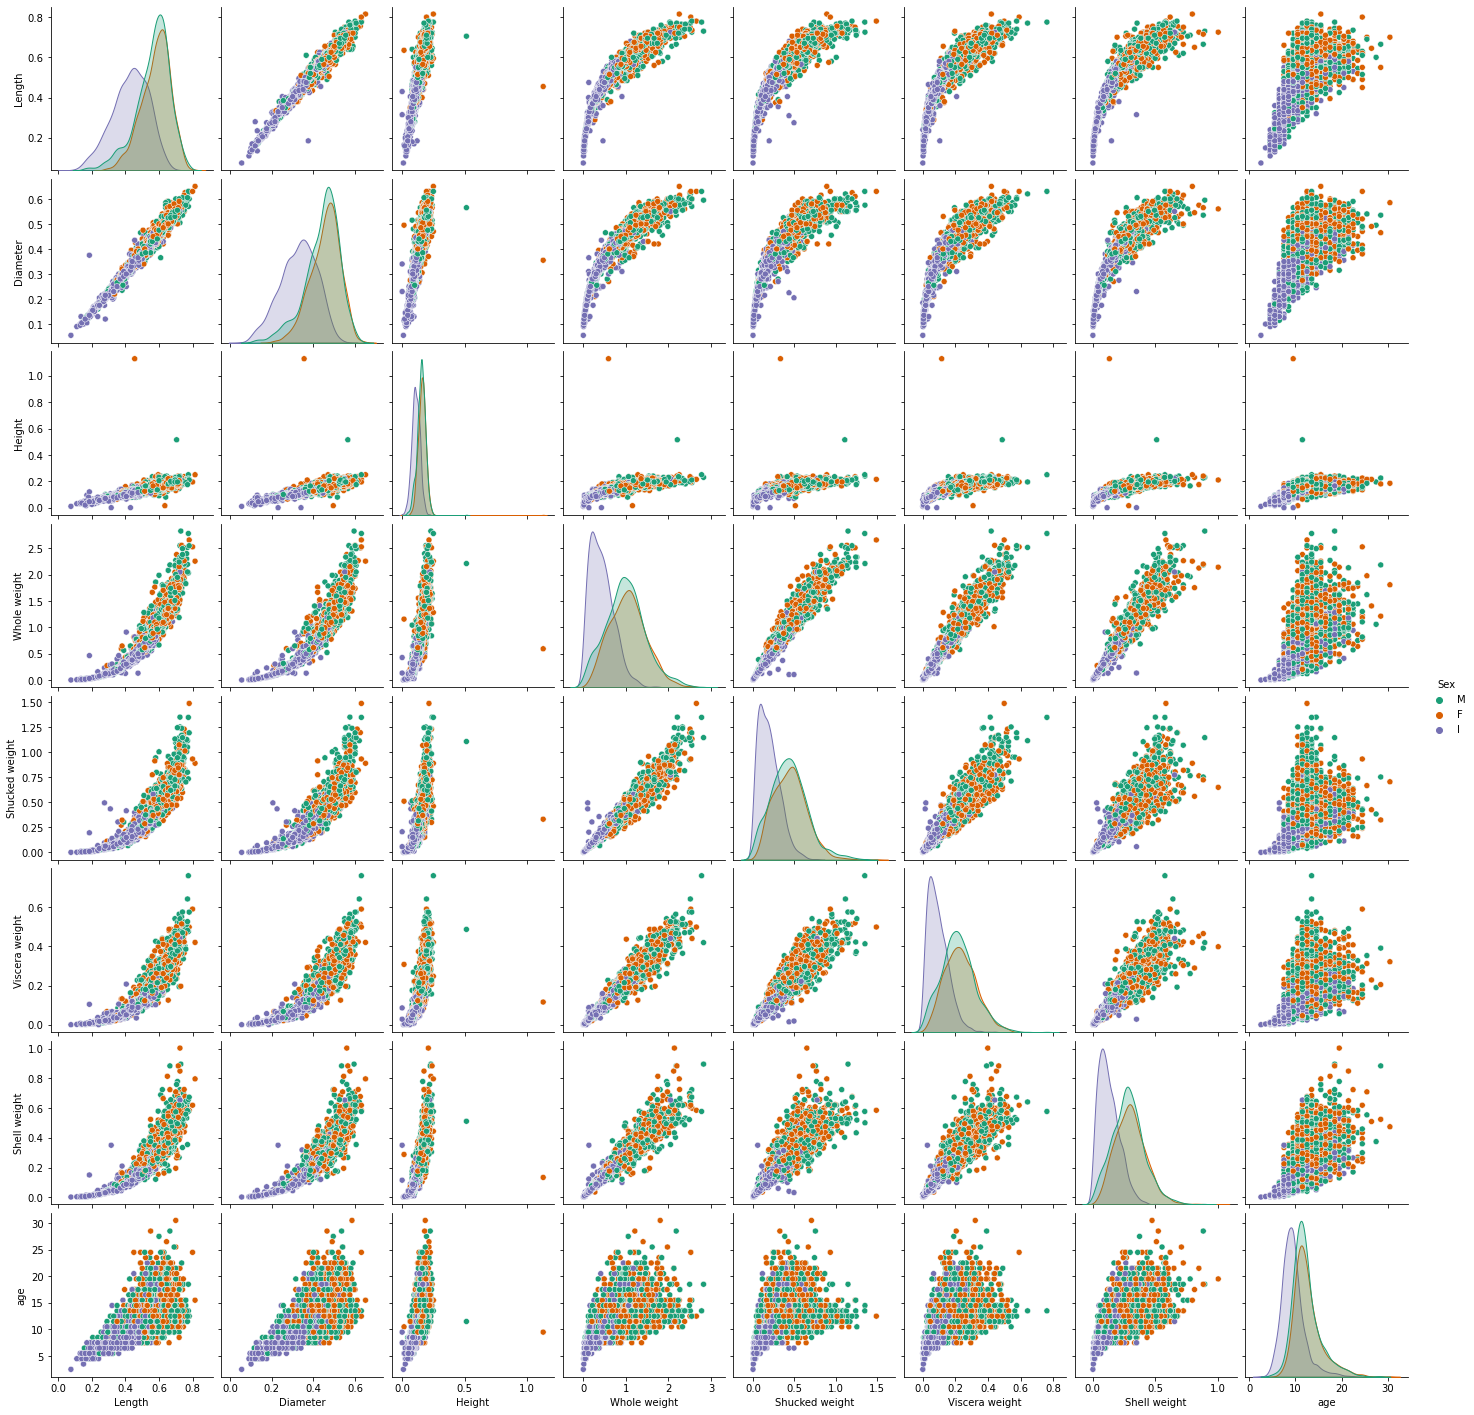

In [25]:
sns.pairplot(data = df, hue = 'Sex', palette = 'Dark2')


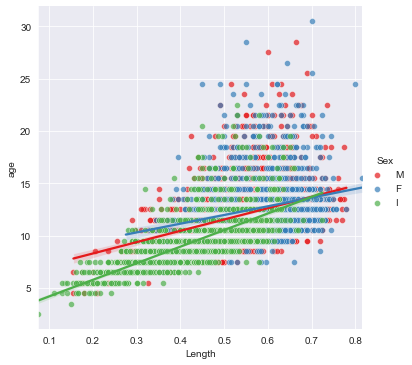

In [26]:
sns.set_style('darkgrid')
sns.lmplot(x = 'Length', y = 'age', data = df, hue = 'Sex', palette = 'Set1', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [27]:
df.drop(df[(df['Length']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Length']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Length']>=0.8) & (df['age']< 25)].index, inplace=True)

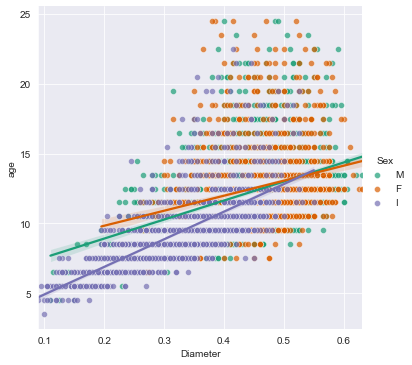

In [28]:
sns.lmplot(x = 'Diameter', y = 'age', data = df, hue = 'Sex', palette = 'Dark2', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [29]:
df.drop(df[(df['Diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

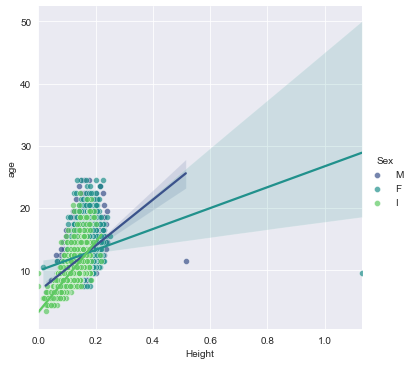

In [30]:
sns.lmplot(x = 'Height', y = 'age', data = df, hue = 'Sex', palette = 'viridis', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [31]:
df.drop(df[(df['Height']>0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['age'] > 25)].index, inplace=True)

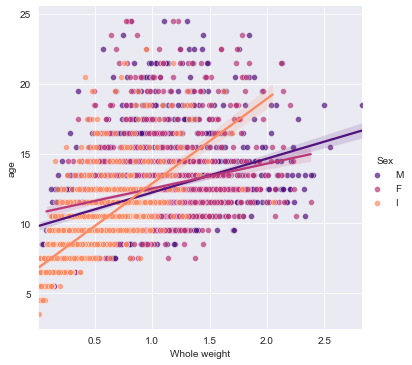

In [32]:
sns.lmplot(x = 'Whole weight', y = 'age', data = df, hue = 'Sex', palette = 'magma', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [33]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['age'] > 25)].index, inplace=True)

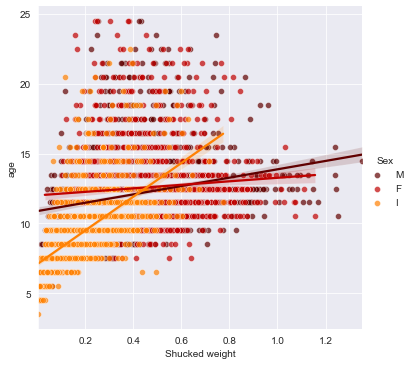

In [34]:
sns.lmplot(x = 'Shucked weight', y = 'age', data = df, hue = 'Sex', palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [35]:
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

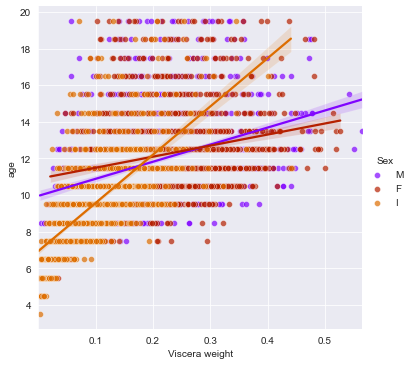

In [36]:
sns.lmplot(x = 'Viscera weight', y = 'age', data = df, hue = 'Sex', palette = 'gnuplot', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [37]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

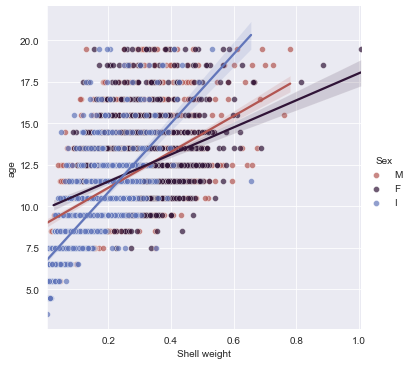

In [38]:
sns.lmplot(x = 'Shell weight', y = 'age', data = df, hue = 'Sex', palette = 'twilight_r', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

In [39]:
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)


<AxesSubplot:>

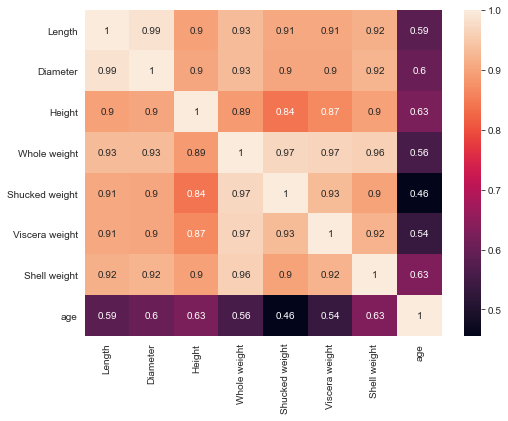

In [40]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [41]:
df.drop('Sex', axis = 1, inplace = True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [42]:
df['age'].value_counts()

10.5    686
11.5    622
9.5     567
12.5    469
8.5     391
7.5     259
13.5    247
14.5    197
15.5    118
6.5     115
16.5    102
17.5     61
5.5      57
18.5     51
19.5     38
4.5      14
3.5       1
Name: age, dtype: int64

In [43]:
df['age'].mean()

11.127284105131414

In [44]:
df_1 = df.copy()

In [45]:
Age = []
for i in df_1['age']:
    if i > 11.12:
        Age.append('1')
    else:
        Age.append('0')
df_1['Age'] = Age
df_1.drop('age', axis = 1, inplace = True)
df_1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [46]:
df_1['Age'].value_counts()

0    2090
1    1905
Name: Age, dtype: int64

In [47]:
X = df_1.drop('Age', axis = 1).values
y = df_1['Age'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       611
           1       0.78      0.72      0.75       588

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199

Confusion Matrix: 
 [[494 117]
 [167 421]]
Training Score:  0.7832618025751072
Testing Score:  0.7631359466221852


In [51]:
svc = SVC(C = 1, gamma= 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train) 
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       611
           1       0.77      0.78      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[477 134]
 [130 458]]
Training Score:  0.8029327610872675
Testing Score:  0.7798165137614679


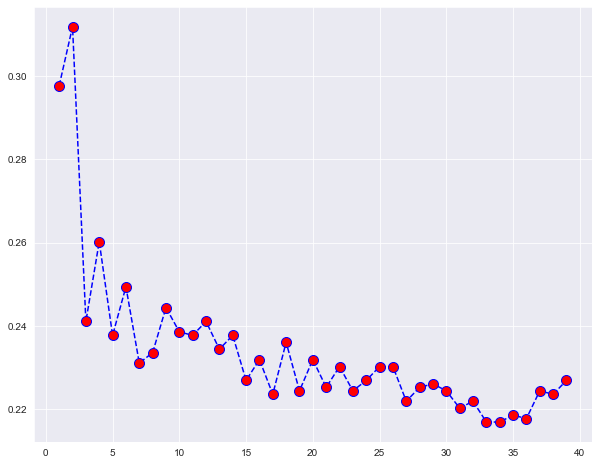

In [52]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [53]:
knn = KNeighborsClassifier(n_neighbors= 31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train) 
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       611
           1       0.78      0.77      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[480 131]
 [133 455]]
Training Score:  0.7896995708154506
Testing Score:  0.7798165137614679


In [54]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train) 
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       611
           1       0.75      0.78      0.77       588

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199

Confusion Matrix: 
 [[457 154]
 [127 461]]
Training Score:  0.796137339055794
Testing Score:  0.7656380316930775


In [55]:
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train) 
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)


Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77       611
           1       0.76      0.77      0.76       588

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199

Confusion Matrix: 
 [[467 144]
 [136 452]]
Training Score:  0.8090128755364807
Testing Score:  0.7664720600500416


In [56]:
adb = AdaBoostClassifier(n_estimators= 100)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train) 
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       611
           1       0.75      0.75      0.75       588

    accuracy                           0.76      1199
   macro avg       0.76      0.76      0.76      1199
weighted avg       0.76      0.76      0.76      1199

Confusion Matrix: 
 [[466 145]
 [148 440]]
Training Score:  0.8004291845493562
Testing Score:  0.755629691409508


In [57]:
gdb = GradientBoostingClassifier(n_estimators= 200, max_depth = 2, min_samples_leaf= 2)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)

print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       611
           1       0.79      0.77      0.78       588

    accuracy                           0.78      1199
   macro avg       0.78      0.78      0.78      1199
weighted avg       0.78      0.78      0.78      1199

Confusion Matrix: 
 [[490 121]
 [138 450]]
Training Score:  0.8193848354792561
Testing Score:  0.7839866555462885
